# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**:  
**Question 1**:For each city, which dock areas are the most used?  
**Question 2**: Which time of the day do most commuters use the system?  
**Question 3**: What is the expenditure for maintaining a bike?  
**Question 4**: What is the charge for using the bike?How many miniutes are included in the charge?   
**Question 5**: Is a docking station nearby?  

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader =csv.DictReader(f_in)
        ## Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip=next(trip_reader)
        ## Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    # time is a dictionary that will have the city names as key and the duration 
    #of each first row as the values
    time={}
    
    #If the duration key is from NYC or Chicago then convert the value from seconds 
    #to minutes and store with the city as key in time dictionary
    if 'tripduration' in datum:
        time[city]=float(datum['tripduration'])/60.0
    else: #if from washington convert from milliseconds to minutes and store
        time[city]=float(datum['Duration (ms)'])/(60.0*1000)
        
    #for each city we assign the value which is duartion (minutes) to a variable "duration" 
    #and return it. 
    for city in time:
        duration=time[city]

    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    # dictionary containing city as key and tupple of 3 data time values.
    start_time_details={}
    
    #Depending on starttime/ start date key in datum and the particular city create the 
    #datetime object.
    if 'starttime' in datum and city=='NYC':
        time_value=datum['starttime']
        date_time= datetime.strptime(time_value, '%m/%d/%Y %H:%M:%S')
    elif 'starttime' and city=='Chicago':
        time_value=datum['starttime']
        date_time= datetime.strptime(time_value, '%m/%d/%Y %H:%M')
    elif 'Start date':
        time_value=datum['Start date']
        date_time= datetime.strptime(time_value, '%m/%d/%Y %H:%M')
        
    #converts the string time format codes in a readable way to get the desired output    
    month=int(date_time.strftime('%m'))
    day=int(date_time.strftime('%d'))
    hour=int(date_time.strftime('%H'))
    day_of_week=date_time.strftime('%A')

    #Add the values and key to the dictionary
    start_time_details[city]=month, hour, day_of_week
    
    return month, hour, day_of_week

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # A dictionary of city names as key and the usertypes as values
    user_type_details={}
    
    if 'usertype' in datum:
        user_type_details[city]=datum['usertype']
    elif datum['Member Type'] == 'Registered':
        user_type_details[city]='Subscriber'
    elif datum['Member Type'] == 'Casual':
        user_type_details[city]='Customer'
    
    #Assign the value of the dictionary to the variable user_type.
    for city in user_type_details:
        user_type=user_type_details[city]
        
    return user_type
    


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [10]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)
        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## use the helper functions to get the cleaned data from        ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point['duration']=duration_in_mins(row, city)
            new_point['month'], new_point['hour'], new_point['day_of_week']= time_of_trip(row,city)
            new_point['user_type']= type_of_user(row, city)
            ## write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)

In [13]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


In [14]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the proportion of
    trips made by subscribers, customers, and the number of total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # compute proportion of subscribers
        subscribers_proportion=n_subscribers/n_total
        
        # compute proportion of customers
        customers_proportion=n_customers/n_total
        
        # return tallies as a tuple
        return(subscribers_proportion, customers_proportion, n_total)

> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: NYC has highest number of trips.
NYC has highest proportion of trips made by subscribers.
Chicago has highest proportion of trips made by customers.

In [15]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##
def maximum(dict):
    """
    This function takes in a dictionary as the input and finds the key with the highest value.
    """
    return (max(dict, key=dict.get))

total_trips={} # dictionary of total trips per city 
proportion_trips_of_subscribers={} # dictionary of proportion of trips made by subscribers.
proportion_trips_of_customers={} # dictionary of proportion of trips made by customers.

for city, filenames in city_info.items():
    data_file = filenames['out_file']  
    city_subscribers_proportion, city_customers_proportion, total=number_of_trips(data_file)
    total_trips[city]=total
    proportion_trips_of_subscribers[city]=city_subscribers_proportion
    proportion_trips_of_customers[city]=city_customers_proportion    

#Compute and print the city with the highest number of trips.
print(str(maximum(total_trips))+ ' has highest number of trips')
#Compute and print the city with the highest proportions of trips made by subscribers.
print(str(maximum(proportion_trips_of_subscribers))+ ' has highest proportion of trips made by subscribers')
##Compute and print the city with the highest proportion of trips made by customers.
print(str(maximum(proportion_trips_of_customers))+ ' has highest proportion of trips made by customers')

NYC has highest number of trips
NYC has highest proportion of trips made by subscribers
Chicago has highest proportion of trips made by customers


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: Average trip length in Washington is 18.93 mins.  Average trip length in Chicago is 16.56 mins.  Average trip length in NYC is 15.81 mins.  
  
10.84 % of trips in Washington had duration greater than 30 minutes. 8.33 % of trips in Chicago had duration greater than 30 minutes. 7.3 % of trips in NYC had duration greater than 30 minutes

In [16]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##

def trip_length(filename):
    """
    This function takes in a data file as input and returns the average trip length for each city and
    also the proportion of rides made in each city that are longer than 30 minutes.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        # initialize count variables
        duration_greater_than_30=0 # sum of trip lengths greater than 30
        row_no_for_greater_than_30=0 # frequency of trip lengths greater than 30
        duration_less_than_30=0 # sum of trip lengths less than 30
        row_no_for_less_than_30=0 # frequency of trip lengths less than 30
    
        #tally up duration types and their frequency
        for row in reader:
            if float(row['duration'])>30.0:
                row_no_for_greater_than_30+=1
                duration_greater_than_30+=float(row['duration'])
            else:
                row_no_for_less_than_30+=1
                duration_less_than_30+=float(row['duration'])
        
        #compute the number of total trips.
        total_rows=row_no_for_greater_than_30+row_no_for_less_than_30
        #Compute the average trip length of a city
        average=round((duration_greater_than_30+duration_less_than_30)/total_rows, 2)
        #compute the proportion of trips where the trip length is greater than 30 minutes
        proportion=round((row_no_for_greater_than_30/total_rows)*100, 2)
        
        return (average, proportion)



In [17]:
#print the average trip length of bike ride for each city. And also the propertion
#of trips having a trip length greater than 30 mins.
for city, filenames in city_info.items():
    data_file = filenames['out_file']
    average_trip_length, proportion_of_trips_greater_than_30= trip_length(data_file)
    print('Average trip length in {} is {} mins'.format(city, average_trip_length))
    print('{} % of trips in {} had duration greater than 30 minutes'.format(proportion_of_trips_greater_than_30, city))
    

Average trip length in Washington is 18.93 mins
10.84 % of trips in Washington had duration greater than 30 minutes
Average trip length in Chicago is 16.56 mins
8.33 % of trips in Chicago had duration greater than 30 minutes
Average trip length in NYC is 15.81 mins
7.3 % of trips in NYC had duration greater than 30 minutes


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: From the output below we see that customers takes longer rides on average than subscribers for all three cities.

In [18]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##
def average_ride_time_based_on_user_type(filename):
    
    """
    This function takes in a data file as input and returns the average trip length 
    of subscriber and customer for each city.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        # initialize count variables
        sum_subscriber=0 # Sum of trip lengths of subscribers.
        count_subscriber=0 # number of total subscribers.
        sum_customer=0 # Sum of trip lengths of customers.
        count_customer=0 # number of total customers.
        
        #tally up user types and their frequency.
        for row in reader:
            if row['user_type']=='Subscriber':
                count_subscriber+=1
                sum_subscriber+=float(row['duration'])
            elif row['user_type']== 'Customer':
                count_customer+=1
                sum_customer+=float(row['duration'])
        
        #compute the average trip length of subscribers.
        average_subscriber=sum_subscriber/count_subscriber
        #compute the average trip length of customers.
        average_customer=sum_customer/count_customer
        
        return average_subscriber, average_customer


In [19]:
## for each city find the average Subscriber trip duration and the average Customer trip duration
for city, filenames in city_info.items():
    data_file = filenames['out_file']
    average_subscriber_trip_duration, average_customer_trip_duration=average_ride_time_based_on_user_type(data_file)
    print('The average Subscriber trip duration for {} is {} minutes and the average Customer trip duration is {} minutes'
         .format(city, round(average_subscriber_trip_duration, 2), round(average_customer_trip_duration, 2)))

The average Subscriber trip duration for Washington is 12.53 minutes and the average Customer trip duration is 41.68 minutes
The average Subscriber trip duration for Chicago is 12.07 minutes and the average Customer trip duration is 30.98 minutes
The average Subscriber trip duration for NYC is 13.68 minutes and the average Customer trip duration is 32.98 minutes


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

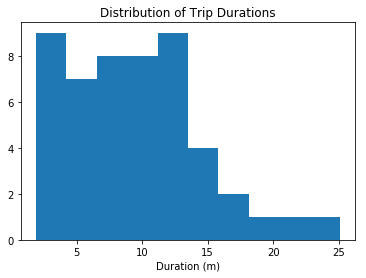

In [20]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

In [21]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
import numpy as np
def list_of_trip_times(filename):
    
    """
    This function takes in a data file as input and return a list of trip times for that city.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        # initialize list
        list=[]
        
        #trip times to the list of each city
        for row in reader:
            list.append(float(row['duration']))
        return list

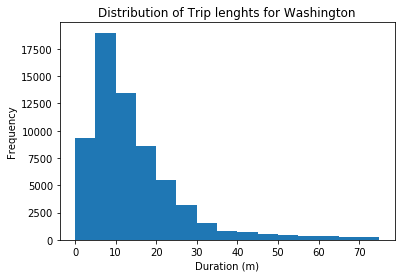

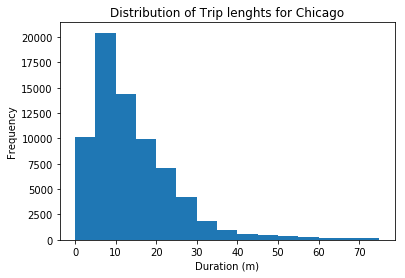

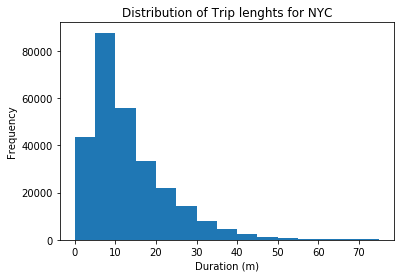

In [22]:
for city, filenames in city_info.items():
    data_file = filenames['out_file']
    list= list_of_trip_times(data_file)
    #np.arange starts the x-axis from 0 to 75 with a interval size of 5
    plt.hist(list, bins=np.arange(0, 76, 5))
    plt.title('Distribution of Trip lenghts for {}'.format(city))
    plt.xlabel('Duration (m)')
    plt.ylabel('Frequency')
    plt.show()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: For the city of washington the peak of discribution for the Subscribers and customers are between 5-10 minutes and 15-20 minutes respectively. Both the graphs are unimodal and are skewed to the right.  

For the city of Chicago the peak of discribution for the Subscribers and customers are between 5-10 minutes and 20-25 minutes respectively. Both the graphs are unimodal and are skewed to the right.  

For the city of NYC the peak of discribution for the Subscribers and customers are between 5-10 minutes and 20-25 minutes respectively. Both the graphs are skewed to the right. Although the subscribers histogram is definitely unimodal the customer histogram appears to be bimodal. But once we print the values we see that that 20-25 minutes have the highest frequency of 5270 and the closest to that is 15-20 minutes with a frequency of 5221. So basically the customer histogram in unimodal as well. 

In [23]:
## Use this and additional cells to answer Question 5. ##
def list_of_trip_by_usertype(filename):
    """
    This function takes in a data file as input and return 2 lists of trip times 
    for 2 user types for that city.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        # initialize list of trip lengths of subscribers and cutomers
        list_subscriber=[]
        list_customer=[]
        
        #add the trip lengths to the empty list
        for row in reader:
            if row['user_type']=='Subscriber':
                list_subscriber.append(float(row['duration']))
            elif row['user_type']=='Customer':
                list_customer.append(float(row['duration']))
                
        return list_subscriber, list_customer

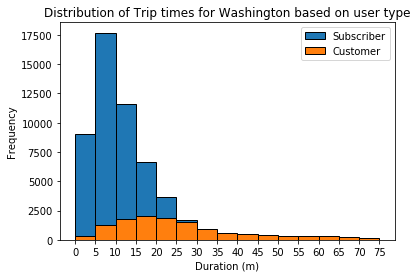

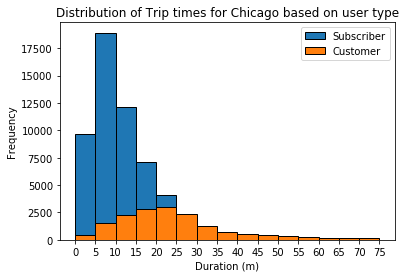

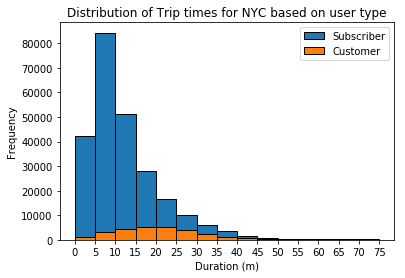

In [24]:
for city, filenames in city_info.items():
    data_file = filenames['out_file']
    list_S, list_C= list_of_trip_by_usertype(data_file)
    #with np.arange function the endpoint is not included. So setting it at 75,sets the 
    #endpoint to 70. We wanted less than 75, so to increase the data points I have endpoint
    #set to 76, that includes 75 now. Changing the bin size to 2 I would have been able 
    #to achieve endpoint till 74.
    
    #ec is "edgecolor" keyword argument from patch initializer to draw the edges of the bar.
    plt.hist(list_S, bins=np.arange(0, 76, 5), label='Subscriber', ec='black')
    plt.hist(list_C, bins=np.arange(0, 76, 5), label='Customer', ec='black')
    #print(plt.hist(list_C, bins=np.arange(0, 76, 5), label='Customer', ec='black'))
    plt.legend(loc='upper right')
    plt.xticks(range(0, 76,5))
    plt.title('Distribution of Trip times for {} based on user type'.format(city))
    plt.xlabel('Duration (m)')
    plt.ylabel('Frequency')
    plt.show()

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**:  
**Question 6a**: How does ridership differ by month? Which month has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month?

Washington: 
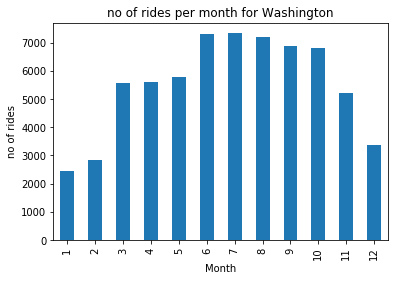
The ridership is high for the month of June through October with the highest being in July (7341 rides). In November we see a decrease in ridership that continues through December till February. And then it starts to increase again. 

   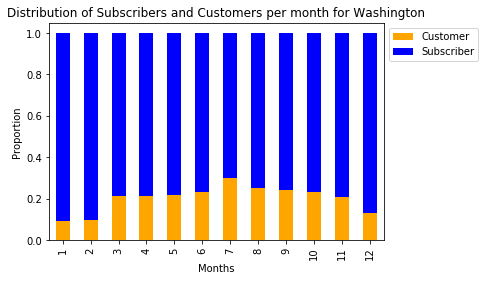
From the bar chart we can see that the ratio of subscriber to customer changes with months.The ratio is high during January and February, it then decreases and is consistent from March through November with slight decrease in July and August. The ratio starts increasing in December again.

Chicago:
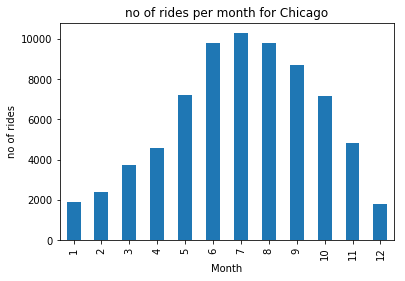

The distribution of ridership in Chicago is a bell curve with a gradual increase from January, reaching the highest in July(10286) and then decreasing gradually to December.

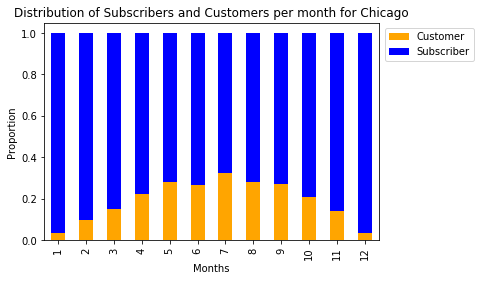
The ratio of subscriber to customer is highest in December and January. It decreases from February till May and remains consistent through till September and then again starts increasing again.

NYC:
   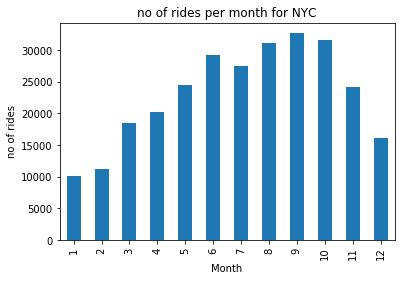
The ridership starts increasing from January reaching the highest in September (32699) and then decreasing gradually till December.

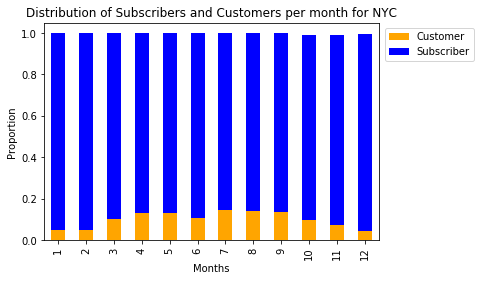

The ratio increases from November to December with slight decrease in January and February. From March the ratio decreases till October although the it is fairly consistent.

In [25]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##

In [26]:
import pandas as pd
def trips_per_month(filename):
    """
    This function takes in a data file as input and return 2 series for counts 
    and duration that are grouped by month. Also the month, that had the highest ridership.
    """
    #loads data from filename into the dataframe object df.
    df=pd.read_csv(filename)
    #counts no of trips per month, sorts the series by index(months) and creates 
    #a dictionary of month and no of trips as key and value respectively.
    counts = df['month'].value_counts().sort_index()
    
    #finds the index of the series (month) with the highest value, so the month 
    #with highest ridership
    highest_month=counts[counts==max(counts)].index[0]
    
    #group by month column and get sum of the durations per month then convert into dictionary.
    sum_duration=round((df.groupby('month')['duration'].sum()), 2)
    
    return counts, highest_month, sum_duration


no of rides/ month for Washington:

1     2434
2     2854
3     5571
4     5602
5     5768
6     7320
7     7341
8     7198
9     6878
10    6792
11    5214
12    3354
Name: month, dtype: int64

duration in minutes/month for Washington:

month
1      31140.22
2      36565.14
3     110075.18
4     109825.69
5     116117.24
6     153950.81
7     168083.57
8     134724.92
9     131644.45
10    125110.32
11     89993.61
12     48510.61
Name: duration, dtype: float64

Washington had the highest ridership on the month of 7


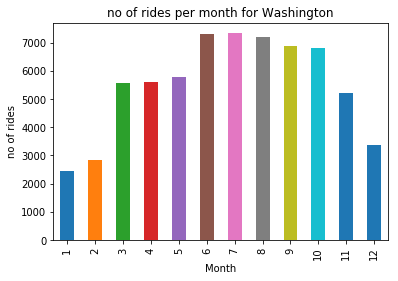

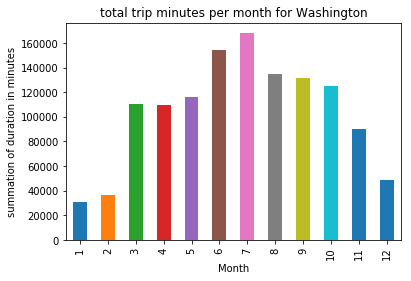


no of rides/ month for Chicago:

1      1901
2      2394
3      3719
4      4567
5      7211
6      9794
7     10286
8      9810
9      8700
10     7160
11     4811
12     1778
Name: month, dtype: int64

duration in minutes/month for Chicago:

month
1      20123.38
2      29349.18
3      48179.48
4      75996.93
5     129601.58
6     175539.07
7     202220.48
8     175718.93
9     146131.32
10    107158.35
11     64913.33
12     19819.10
Name: duration, dtype: float64

Chicago had the highest ridership on the month of 7


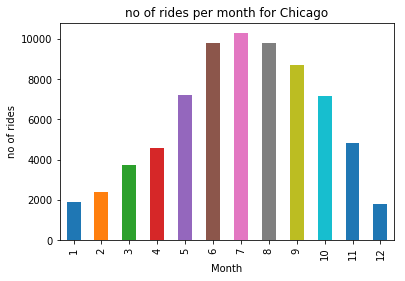

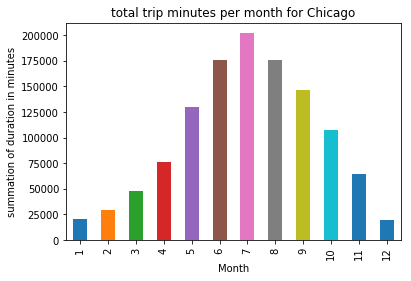


no of rides/ month for NYC:

1     10180
2     11170
3     18413
4     20160
5     24455
6     29242
7     27522
8     31104
9     32699
10    31519
11    24148
12    16186
Name: month, dtype: int64

duration in minutes/month for NYC:

month
1     145455.82
2     172196.02
3     296915.18
4     362889.82
5     425308.17
6     500678.72
7     429847.08
8     489154.63
9     509172.33
10    463388.05
11    370583.45
12    211304.85
Name: duration, dtype: float64

NYC had the highest ridership on the month of 9


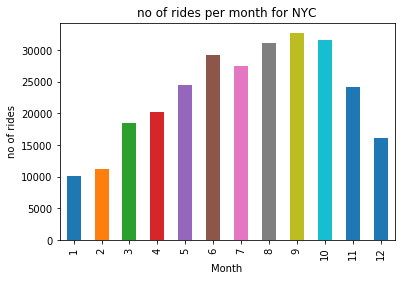

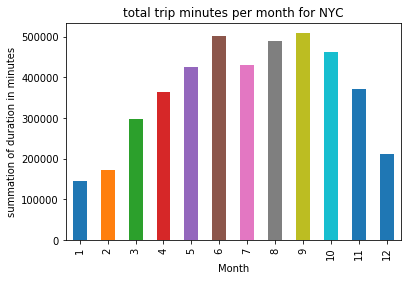

In [27]:
for city, filenames in city_info.items():
    data_file = filenames['out_file']
    no_of_rides, highest_trip_month, duration_of_rides= trips_per_month(data_file) 
    print('\nno of rides/ month for {}:\n'.format(city))
    pprint(no_of_rides)
    print('\nduration in minutes/month for {}:\n'.format(city))
    pprint(duration_of_rides)
    print('\n{} had the highest ridership on the month of {}'.format(city, highest_trip_month))
    
    #bar plot of month vs number of rides
    no_of_rides.plot(kind='bar')
    plt.xlabel('Month')
    plt.ylabel('no of rides')
    plt.title('no of rides per month for {}'.format(city))
    plt.show()
    
    #bar plot of month vs summation of duration of minutes
    duration_of_rides.plot(kind='bar')
    plt.xlabel('Month')
    plt.ylabel('summation of duration in minutes')
    plt.title('total trip minutes per month for {}'.format(city))
    plt.show()

In [28]:
def ratio_of_subscriber_customer_per_month(filename):
    """
    This fuction takes a data file as input and returns the proportion of each usertype
    and the ratio of Subscriber to customer per month
    """
    #loads data from filename into the dataframe object df.
    df=pd.read_csv(filename)
    #counts the no of trips per unique month and sorts the result monthwise.
    counts = df['month'].value_counts().sort_index()
    #group by usertype and month and then count the trips.
    total_user_type_by_month=df.groupby(['user_type', 'month']).size()
    #calculate the proportion of usertype per month. The two variable is related through month.
    proportion=total_user_type_by_month.div(counts, level='month')
    #unstack to use usertype as column.
    proportion_per_usertype = proportion.unstack(level=0)
    #calculate ratio of subscriber to customer per month.
    ratio=total_user_type_by_month['Subscriber'].div(total_user_type_by_month['Customer'], level='month')
    return proportion_per_usertype, ratio

Washington:
user_type  Customer  Subscriber
month                          
1          0.091208    0.908792
2          0.099159    0.900841
3          0.213247    0.786753
4          0.212781    0.787219
5          0.216366    0.783634
6          0.233197    0.766803
7          0.297780    0.702220
8          0.250903    0.749097
9          0.243385    0.756615
10         0.229682    0.770318
11         0.206176    0.793824
12         0.128801    0.871199

Washington Subscriber to customer ratio:
month
1     9.963964
2     9.084806
3     3.689394
4     3.699664
5     3.621795
6     3.288225
7     2.358188
8     2.985604
9     3.108722
10    3.353846
11    3.850233
12    6.763889
dtype: float64



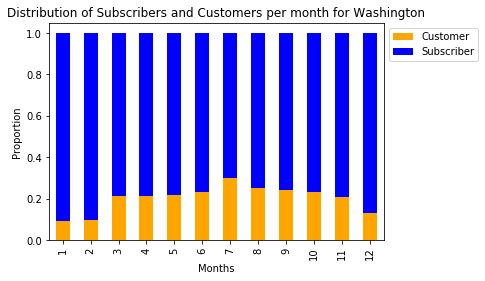

Chicago:
user_type  Customer  Subscriber
month                          
1          0.032614    0.967386
2          0.095238    0.904762
3          0.151923    0.848077
4          0.222684    0.777316
5          0.279018    0.720982
6          0.266694    0.733306
7          0.323060    0.676940
8          0.281040    0.718960
9          0.270575    0.729425
10         0.208380    0.791620
11         0.138641    0.861359
12         0.033746    0.966254

Chicago Subscriber to customer ratio:
month
1     29.661290
2      9.500000
3      5.582301
4      3.490659
5      2.583996
6      2.749617
7      2.095396
8      2.558215
9      2.695837
10     3.798928
11     6.212894
12    28.633333
dtype: float64



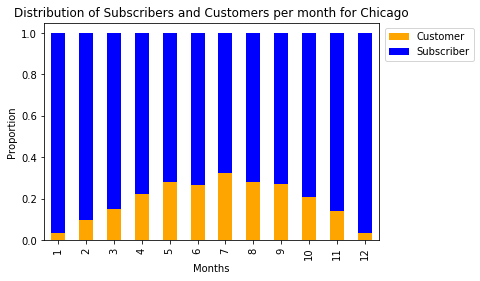

NYC:
user_type  Customer  Subscriber
month                          
1          0.047937    0.952063
2          0.050940    0.949060
3          0.101993    0.898007
4          0.130556    0.869444
5          0.131221    0.868779
6          0.107243    0.892757
7          0.144503    0.855497
8          0.141847    0.858153
9          0.134347    0.865653
10         0.095371    0.892763
11         0.074499    0.915562
12         0.042382    0.951254

NYC Subscriber to customer ratio:
month
1     19.860656
2     18.630931
3      8.804579
4      6.659574
5      6.620754
6      8.324617
7      5.920292
8      6.049864
9      6.443433
10     9.360945
11    12.289605
12    22.444606
dtype: float64



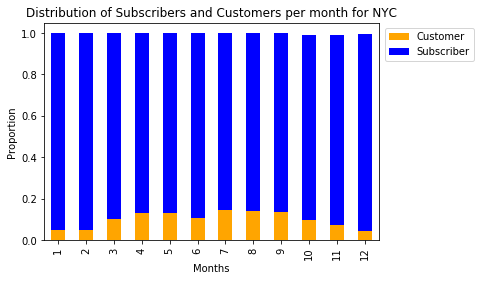

In [29]:
for city, filenames in city_info.items():
    data_file = filenames['out_file']
    no_of_users,ratio_subscriber_to_customer= ratio_of_subscriber_customer_per_month(data_file) 
    print('{}:\n{}\n'.format(city, no_of_users))
    print('{} Subscriber to customer ratio:\n{}\n'.format(city, ratio_subscriber_to_customer))
    no_of_users.plot.bar(stacked=True, color=['orange', 'blue'])
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1.0))
    plt.title('Distribution of Subscribers and Customers per month for {}'.format(city))
    plt.xlabel('Months')
    plt.ylabel('Proportion')
    plt.show()

**Question 6b**: Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?

**Answer**:
Washington:
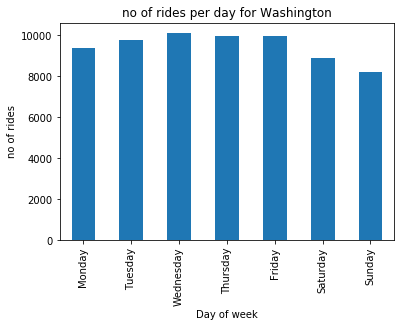

For the city of Washington the number of riderships in the weekends are slightly less compared to the weekdays.

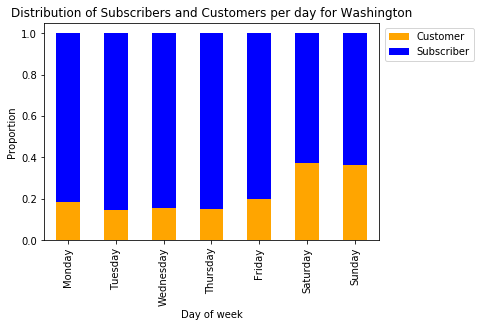

We can see from the bar plot that Subscribers are more likely to use the system on weekdays, whereas customers are more likely to use the system on weekends.

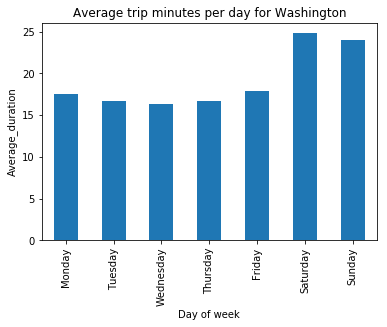

On the weekends the average duration of rides are significantly more than the weekdays as can be observed from the bar plot.

Chicago:
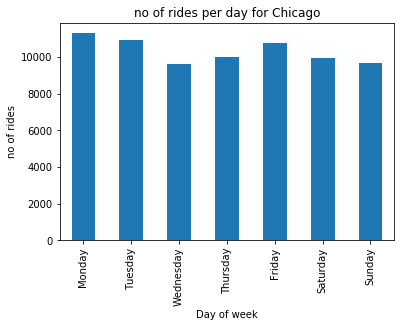

For Chicago we don't see a significant difference in ridership in weekends than in weekdays. The start of weekdays (Monday, Tuesday) and end of weekdays(Friday) had more riderships compared to rest of the week.

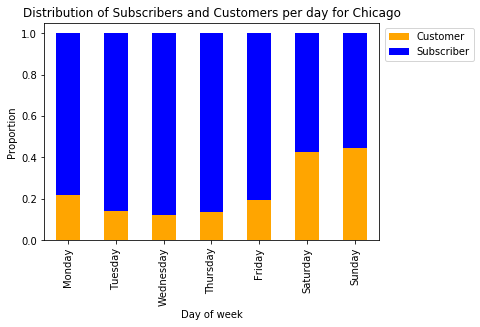

Like Washington, We can see from the bar plot of Chicago, that Subscribers are more likely to use the system on weekdays, whereas customers are more likely to use the system on weekends.

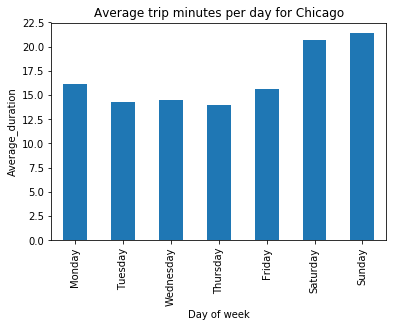

On the weekends the average duration of rides are significantly more than the weekdays as can be observed from the bar plot.

NYC:
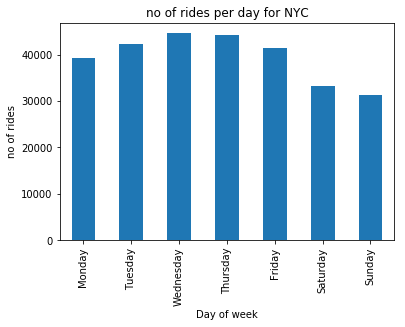

For the city of NYC the number of riderships in the weekends are less compared to the weekdays.

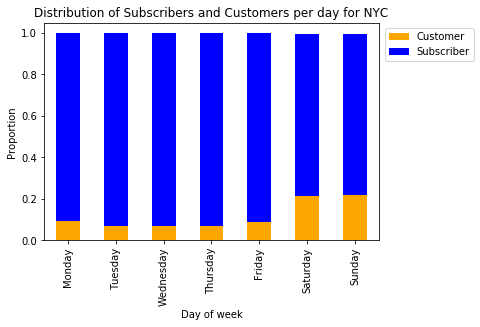
Like Washington and Chicago, we can see from the bar plot of NYC, that Subscribers are more likely to use the system on weekdays, whereas customers are more likely to use the system on weekends.

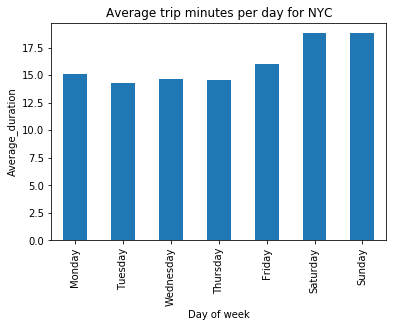

Like Washington and Chicago, the average duration of rides on the weekends are significantly more than the weekdays as can be observed from the bar plot.

In [30]:
#week
import pandas as pd
def trips_per_day(filename):
    """
    This takes the data file as the input and returns the trips per day, trip length per day,
    the day with highest trip length and the average trip length per day.
    """
    #loads data from filename into the dataframe object df.
    df=pd.read_csv(filename)
    #to order the result by the list in the variable 'categories'
    df['day_of_week'] = pd.Categorical(df['day_of_week'], 
        categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], 
                                       ordered=True)
    ##counts the no of trips per unique day of week and sorts the result index wise(the day of week)
    counts = df['day_of_week'].value_counts().sort_index()
    #group by day_of_week column and get sum of the durations per day.
    sum_day=round((df.groupby('day_of_week')['duration'].sum()),2) 
    
    #computes the day of the week which has the highest trip count and returns the index(the day)
    maximum_trips=counts[counts==max(counts)].index[0]
    #computes the average per day by dividing the sum of a day by its count. The two variables
    #sum_day and counts are linked by day_of_week.
    average_per_day=round((sum_day.div(counts, level='day_of_week')),2)
    
    return counts, sum_day, maximum_trips, average_per_day

In [ ]:
for city, filenames in city_info.items():
    data_file = filenames['out_file']
    no_of_rides_per_day, duration_of_rides_per_day, highest_no_of_trips, average_duration_per_day= trips_per_day(data_file)
    
    print('\nno_of_rides_per_day for {}:\n'.format(city))
    print(no_of_rides_per_day)
    print('\nduration_of_rides_per_day for {}:\n'.format(city))
    print(duration_of_rides_per_day)   
    print('\n{} had the highest ridership on the day of {}'.format(city, str(highest_no_of_trips)))
    print('\naverage_duration_of_rides_per_day for {}:\n'.format(city))
    print(average_duration_per_day)
    
    #bar plot of day of week vs no of rides
    no_of_rides_per_day.plot(kind='bar')
    plt.xlabel('Day of week')
    plt.ylabel('no of rides')
    plt.title('no of rides per day for {}'.format(city))
    plt.show()
    
    #bar plot of day of week vs summation of the duration in minutes
    duration_of_rides_per_day.plot(kind='bar')
    plt.xlabel('Day of week')
    plt.ylabel('summation of duration in minutes')
    plt.title('total trip minutes per day for {}'.format(city))
    plt.show()
    
    #bar plot of day of week vs the average duration per day
    average_duration_per_day.plot(kind='bar')
    plt.xlabel('Day of week')
    plt.ylabel('Average_duration')
    plt.title('Average trip minutes per day for {}'.format(city))
    plt.show()

In [31]:
def proportion_of_subscriber_customer_per_day(filename):
    """
    This takes the data file as the input and returns the proportion of
    subscriber and customer per day
    """
    #loads data from filename into the dataframe object df.
    df=pd.read_csv(filename)
    categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
    df['day_of_week'] = pd.Categorical(df['day_of_week'], categories, ordered=True)
    counts = df['day_of_week'].value_counts().sort_index()
    #group by user_type and day_of_week and sum the no of trips
    total_user_type_by_day=df.groupby(['user_type', 'day_of_week']).size() 
    #calculate the proportion of usertype per day of week. The two variable is related through day of week.
    proportion=total_user_type_by_day.div(counts, level='day_of_week')
    #unstacks the user_type and places it in columns instead of row. Benefits during bar plotting
    proportion_usertype = proportion.unstack(level=0)
    return proportion_usertype

Washington:
user_type    Customer  Subscriber
day_of_week                      
Monday       0.184799    0.815201
Tuesday      0.146286    0.853714
Wednesday    0.156686    0.843314
Thursday     0.153245    0.846755
Friday       0.201805    0.798195
Saturday     0.372022    0.627978
Sunday       0.361614    0.638386



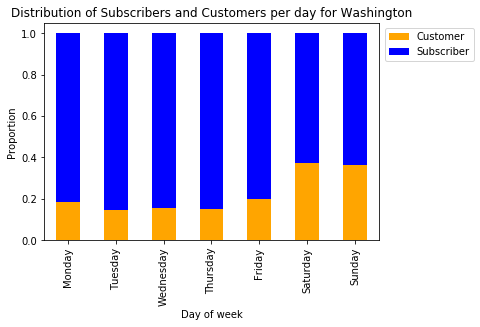

Chicago:
user_type    Customer  Subscriber
day_of_week                      
Monday       0.216729    0.783271
Tuesday      0.142517    0.857483
Wednesday    0.120471    0.879529
Thursday     0.136391    0.863609
Friday       0.194861    0.805139
Saturday     0.428226    0.571774
Sunday       0.443547    0.556453



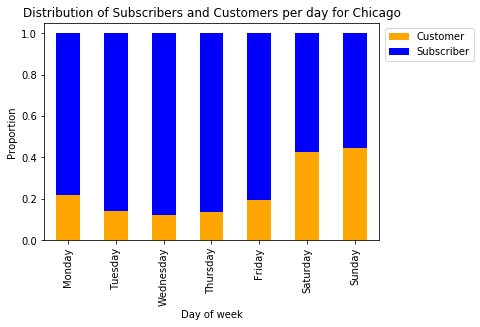

NYC:
user_type    Customer  Subscriber
day_of_week                      
Monday       0.092018    0.905516
Tuesday      0.066808    0.931187
Wednesday    0.070627    0.927715
Thursday     0.069141    0.929326
Friday       0.088671    0.908599
Saturday     0.211945    0.783318
Sunday       0.216127    0.779982



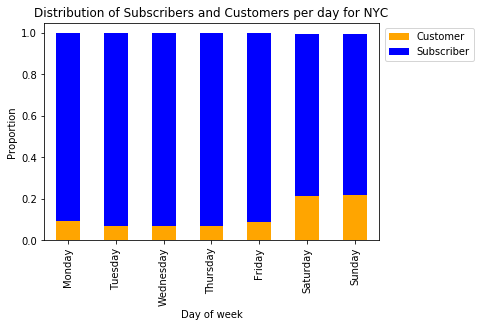

In [32]:
for city, filenames in city_info.items():
    data_file = filenames['out_file']
    no_of_users_per_day= proportion_of_subscriber_customer_per_day(data_file)
    print('{}:\n{}\n'.format(city, no_of_users_per_day))
    
    # bar plot of day of week vs the usage proportion of Subscriber and customer.
    no_of_users_per_day.plot.bar(stacked=True, color=['orange', 'blue'])
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1.0))
    plt.title('Distribution of Subscribers and Customers per day for {}'.format(city))
    plt.xlabel('Day of week')
    plt.ylabel('Proportion')
    plt.show()

**Question 6c**: During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

**Answer**:
Washington:
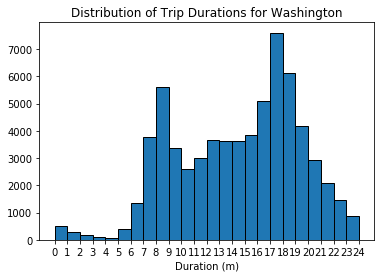

For the city of washington the system is used the most between 17-18 hours(5-6 pm). In general we see that during evening (16-19 hours or 4-7 pm) the system is used more.
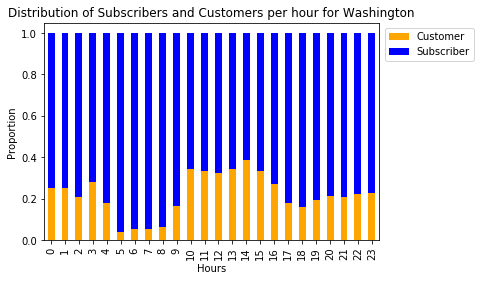

For Washington, Subscribers use the system most between 5-8 AM and in the evening from 5-11 PM. Whereas compared to other times, customers mostly use it from 12 AM till 4 AM and from 10AM till 4PM.

Chicago:
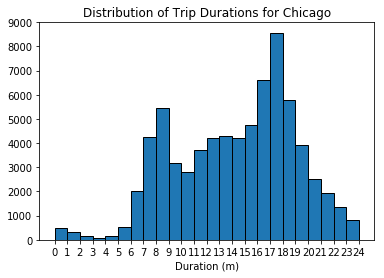

For the city of Chicago the system is used the most between 17-18 hours(5-6 pm). In general we see that during evening (16-19 hours or 4-7 pm) the system is used more.

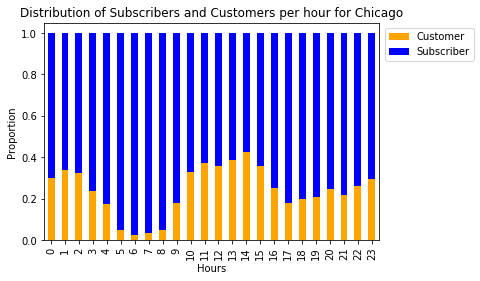

For Chicago, Subscribers use the system most between 5-8 AM and in the evening from 5-11 PM. Whereas compared to other times, customers mostly use it from 12 AM till 4 AM and from 10AM till 4PM.

NYC:
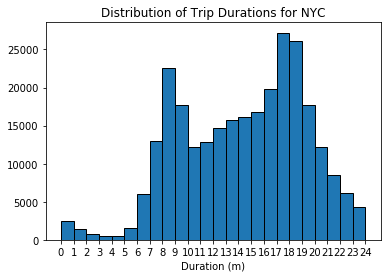

For the city of NYC the system is used the most between 17-18 hours(5-6 pm). In general we see that during evening (16-19 hours or 4-7 pm) the system is used more.

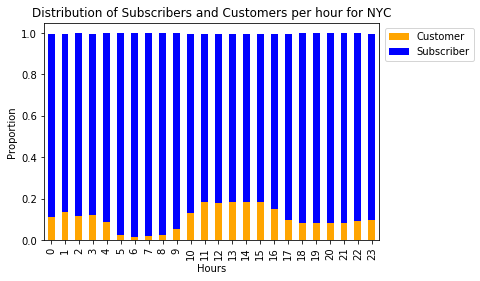

For NYC, Subscribers use the system most between 5-9AM and in the evening from 5-11 PM. Whereas compared to other times, customers mostly use it from 12 AM till 4 AM and from 10AM till 4PM.

In [33]:
def list_of_hours(filename):
    """
    This function takes the data file as an input and returns a list with the start time in hours.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        # initialize a list of start-time hours.
        list=[]
        #add start-time hours of each trip to the list
        for row in reader:
            list.append(float(row['hour']))
        return list

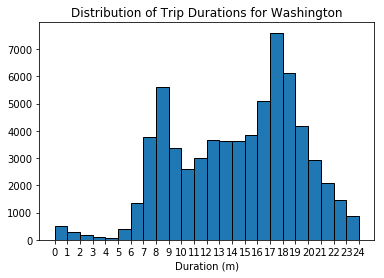

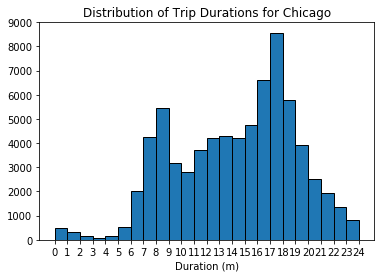

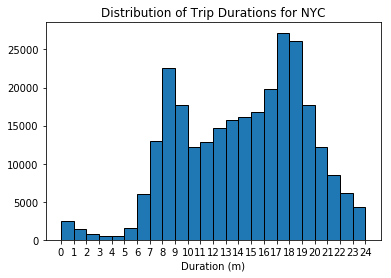

In [34]:
for city, filenames in city_info.items():
    data_file = filenames['out_file']
    list= list_of_hours(data_file) 
    #histogram representing the no. of rides in an hour.
    plt.hist(list, bins=np.arange(0, 24+1,1), ec='black')
    plt.xticks(range(0, 25,1))
    plt.title('Distribution of Trip Durations for {}'.format(city))
    plt.xlabel('Duration (m)')
    plt.show()

In [35]:
def proportion_of_subscriber_customer_per_hour(filename):
    """
    This function takes the data file as an input and returns a dataframe of proportion of hours
    by user type.
    """
    #loads data from filename into the dataframe object df.
    df=pd.read_csv(filename)
    #calculate the trips for uniques hours and sort them from 0-23 hours.
    counts = df['hour'].value_counts().sort_index()
    #calculate the number of trips after grouping by usertype and hour
    total_user_type_by_hours=df.groupby(['user_type', 'hour']).size()
    #calculate the proportion of usertype per hour. The two variable is related through hour.
    proportion=total_user_type_by_hours.div(counts, level='hour')
    #unstacks the usertype from rows to columns
    proportion_hours = proportion.unstack(level=0)
    return proportion_hours

Washington:
user_type  Customer  Subscriber
hour                           
0          0.252427    0.747573
1          0.250836    0.749164
2          0.206522    0.793478
3          0.280899    0.719101
4          0.179104    0.820896
5          0.039312    0.960688
6          0.052710    0.947290
7          0.051601    0.948399
8          0.063936    0.936064
9          0.162074    0.837926
10         0.343175    0.656825
11         0.333445    0.666555
12         0.324516    0.675484
13         0.341671    0.658329
14         0.387017    0.612983
15         0.334813    0.665187
16         0.269201    0.730799
17         0.180921    0.819079
18         0.160367    0.839633
19         0.192932    0.807068
20         0.211611    0.788389
21         0.208494    0.791506
22         0.220014    0.779986
23         0.224942    0.775058



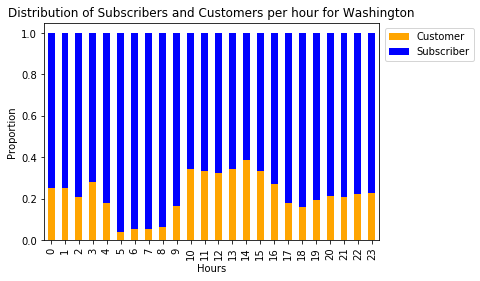

Chicago:
user_type  Customer  Subscriber
hour                           
0          0.298755    0.701245
1          0.340491    0.659509
2          0.325714    0.674286
3          0.238636    0.761364
4          0.175182    0.824818
5          0.048327    0.951673
6          0.024209    0.975791
7          0.032190    0.967810
8          0.046571    0.953429
9          0.178997    0.821003
10         0.327305    0.672695
11         0.373951    0.626049
12         0.356226    0.643774
13         0.387433    0.612567
14         0.425101    0.574899
15         0.358936    0.641064
16         0.251435    0.748565
17         0.178655    0.821345
18         0.198756    0.801244
19         0.209987    0.790013
20         0.247320    0.752680
21         0.216623    0.783377
22         0.259287    0.740713
23         0.293187    0.706813



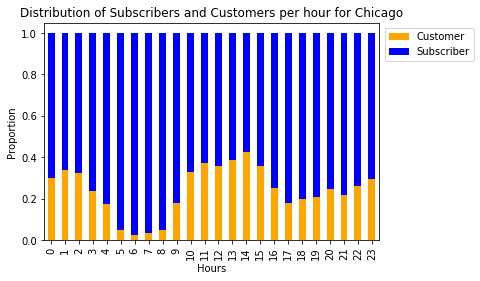

NYC:
user_type  Customer  Subscriber
hour                           
0          0.112659    0.884474
1          0.136926    0.858704
2          0.114365    0.884240
3          0.119048    0.876984
4          0.085487    0.914513
5          0.024841    0.975159
6          0.015497    0.984336
7          0.019638    0.979672
8          0.026475    0.972727
9          0.054734    0.943680
10         0.130864    0.865679
11         0.183280    0.811980
12         0.179937    0.816047
13         0.182467    0.813265
14         0.184670    0.811000
15         0.183859    0.811984
16         0.151427    0.844497
17         0.097651    0.899739
18         0.084400    0.914068
19         0.083659    0.915097
20         0.083839    0.914684
21         0.082892    0.914989
22         0.090411    0.907494
23         0.096257    0.900721



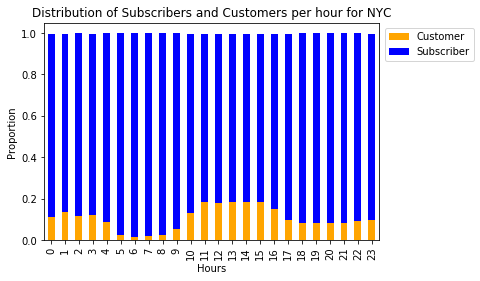

In [36]:
for city, filenames in city_info.items():
    data_file = filenames['out_file']
    users_per_hour_by_type = proportion_of_subscriber_customer_per_hour(data_file) 
    print('{}:\n{}\n'.format(city, users_per_hour_by_type))
    
    # bar plot of hours vs the usage proportion of Subscriber and customer.
    users_per_hour_by_type.plot.bar(stacked=True, color=['orange', 'blue'])
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1.0))
    plt.title('Distribution of Subscribers and Customers per hour for {}'.format(city))
    plt.xlabel('Hours')
    plt.ylabel('Proportion')
    plt.show()

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: I would like to apply the techniques of data science in the prediction of disease risk. I would like to learn about developing pedictive genetic models that can predict the probability of a dieases happening. So starting from how the training data set is collected and selected, how the different models are prepared and assesed, to selecting the best models. Also how the model is validated using external data.

I believe this is an important field for data science as it will shape our health care. Early intervention from this prediction analysis will likely improve the quality of life.

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

**Resources**:
https://www.sciencedirect.com/science/article/pii/S0959437X15000714
https://stackoverflow.com/questions/16766643/convert-date-string-to-day-of-week/16766750
https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior
https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
https://stackoverflow.com/questions/12125880/changing-default-x-range-in-histogram-matplotlib
https://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib
https://stackoverflow.com/questions/36067894/pandas-get-count-of-a-single-value-in-a-column-of-a-dataframe
https://stackoverflow.com/questions/36004976/count-frequency-of-values-in-pandas-dataframe-column
https://stackoverflow.com/questions/48022184/python-dataframe-how-to-group-by-one-column-and-get-sum-of-other-column
https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values
https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts
https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby
https://stackoverflow.com/questions/37514686/how-to-plot-a-bar-graph-from-a-pandas-series
https://stackoverflow.com/questions/40783669/stacked-bar-plot-by-group-count-on-pandas-python
https://stackoverflow.com/questions/50165258/explain-python-unstack-simply
https://jb-blog.readthedocs.io/en/latest/posts/0012-matplotlib-legend-outdide-plot.html
https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend
https://stackoverflow.com/questions/35193808/re-order-pandas-series-on-weekday
https://stackoverflow.com/questions/18327624/find-elements-index-in-pandas-series
http://pandas.pydata.org/pandas-docs/stable/visualization.html
https://pstblog.com/2016/10/04/stacked-charts
https://stackoverflow.com/questions/8462506/how-to-change-ticks-on-a-histogram-matplotlib
https://stackoverflow.com/questions/42542252/cannot-get-histogram-to-show-separated-bins-with-vertical-lines
https://stackoverflow.com/questions/41906199/how-to-make-a-new-line-in-a-jupyter-markdown-cell
https://www.geeksforgeeks.org/working-csv-files-python/

In [11]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0